In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from scipy.stats import zscore
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,recall_score, precision_score, accuracy_score 
from sklearn.metrics import f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
os.chdir("C:\\Users\\HP\\Desktop\\Capstone\\Siram_Anna\\")

In [3]:
df=pd.read_excel('insulin_BINARY_BINS_data.xlsx')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_overall,number_diagnoses,max_glu_serum,A1Cresult,change,readmitted,target
0,Caucasian,Female,[10-20),1,1,7,LOW,HIGH,LOW,MEDIUM,NO,NO,NO,250.01,9,None,None,Ch,>30,0
1,Caucasian,Male,[30-40),1,1,7,LOW,MEDIUM,HIGH,MEDIUM,NO,NO,NO,250.43,7,None,None,Ch,NO,0
2,Caucasian,Male,[40-50),1,1,7,LOW,HIGH,LOW,LOW,NO,NO,NO,250.00,5,None,None,Ch,NO,1
3,Caucasian,Male,[50-60),2,1,2,LOW,MEDIUM,HIGH,MEDIUM,NO,NO,NO,250.00,9,None,None,No,>30,0
4,AfricanAmerican,Female,[40-50),1,1,7,HIGH,MEDIUM,HIGH,MEDIUM,NO,NO,NO,250.70,9,None,None,No,>30,0


In [4]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_overall                0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
change                      0
readmitted                  0
target                      0
dtype: int64

In [5]:
df.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican
gender,Female,Male,Male,Male,Female
age,[10-20),[30-40),[40-50),[50-60),[40-50)
admission_type_id,1,1,1,2,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,2,7
time_in_hospital,LOW,LOW,LOW,LOW,HIGH
num_lab_procedures,HIGH,MEDIUM,HIGH,MEDIUM,MEDIUM
num_procedures,LOW,HIGH,LOW,HIGH,HIGH
num_medications,MEDIUM,MEDIUM,LOW,MEDIUM,MEDIUM


In [6]:
df=df.replace('?',np.nan)

In [7]:
df.isnull().sum()

race                        578
gender                        0
age                           0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_overall                  0
number_diagnoses              0
max_glu_serum                 0
A1Cresult                     0
change                        0
readmitted                    0
target                        0
dtype: int64

In [8]:
df['race'].fillna(df['race'].mode()[0], inplace=True)
# df['diag_1'].fillna(df['diag_1'].mode()[0], inplace=True)
# df['diag_2'].fillna(df['diag_2'].mode()[0], inplace=True)
# df['diag_3'].fillna(df['diag_3'].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_overall                0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
change                      0
readmitted                  0
target                      0
dtype: int64

In [10]:
df.age.value_counts()

[60-70)     4317
[50-60)     4272
[70-80)     3970
[40-50)     3244
[80-90)     2151
[30-40)     1634
[20-30)     1041
[10-20)      549
[90-100)     295
[0-10)       131
Name: age, dtype: int64

In [11]:
df.num_lab_procedures.value_counts()

MEDIUM    8672
HIGH      7989
LOW       4943
Name: num_lab_procedures, dtype: int64

In [12]:
df.time_in_hospital.value_counts()

LOW       11132
MEDIUM     7702
HIGH       2770
Name: time_in_hospital, dtype: int64

In [13]:
df.target.value_counts()

0    12999
1     8605
Name: target, dtype: int64

In [14]:
df['diag_overall'].unique()

array([250.01, 250.43, 250.  , 250.7 , 250.6 , 250.02, 250.42, 250.41,
       250.4 , 250.03, 250.11, 250.52, 250.32, 250.13, 250.82, 250.8 ,
       250.51, 250.22, 250.92, 250.83, 250.12, 250.53, 250.23, 250.93,
       250.81, 250.33, 250.91, 250.5 , 250.1 , 250.31, 250.2 , 250.9 ,
       250.21, 250.3 ])

In [16]:
df['diag_overall'].nunique()

34

In [15]:
df['age'].replace(['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)',
       '[60-70)','[70-80)','[80-90)','[90-100)'], [0,1,2,3,4,5,6,7,8,9], inplace = True)

df['diag_overall'].replace([250.01, 250.43, 250.  , 250.7 , 250.6 , 250.02, 250.42, 250.41,
       250.4 , 250.03, 250.11, 250.52, 250.32, 250.13, 250.82, 250.8 ,
       250.51, 250.22, 250.92, 250.83, 250.12, 250.53, 250.23, 250.93,
       250.81, 250.33, 250.91, 250.5 , 250.1 , 250.31, 250.2 , 250.9 ,
       250.21, 250.3 ], np.arange(0,34), inplace = True)


In [18]:
df.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican
gender,Female,Male,Male,Male,Female
age,1,3,4,5,4
admission_type_id,1,1,1,2,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,2,7
time_in_hospital,3,2,1,3,9
num_lab_procedures,59,44,51,31,47
num_procedures,0,1,0,6,2
num_medications,18,16,8,16,17


In [16]:
df['target'].unique()

array([0, 1], dtype=int64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21604 entries, 0 to 21603
Data columns (total 20 columns):
race                        21604 non-null object
gender                      21604 non-null object
age                         21604 non-null int64
admission_type_id           21604 non-null int64
discharge_disposition_id    21604 non-null int64
admission_source_id         21604 non-null int64
time_in_hospital            21604 non-null object
num_lab_procedures          21604 non-null object
num_procedures              21604 non-null object
num_medications             21604 non-null object
number_outpatient           21604 non-null object
number_emergency            21604 non-null object
number_inpatient            21604 non-null object
diag_overall                21604 non-null float64
number_diagnoses            21604 non-null int64
max_glu_serum               21604 non-null object
A1Cresult                   21604 non-null object
change                      21604 non-null ob

In [18]:
df['age'] = df['age'].astype('category')
df['admission_type_id'] = df['admission_type_id'].astype('category')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')
df['admission_source_id'] = df['admission_source_id'].astype('category')
df['diag_overall'] = df['diag_overall'].astype('category')
df['target'] = df['target'].astype('category')

In [19]:
from scipy.stats import chisquare,chi2_contingency
from decimal import *

#select only categorical fields for chi squared
x = df.select_dtypes(include=['category','object']).drop('target',axis=1)
y = df['target']
k = x.shape[1] 
for i in range(1,k):
    crosstab=pd.crosstab(x.iloc[:,i],y)
    chi_sq_stat,p_value,deg_freedom,exp_freq = chi2_contingency(crosstab)
    if p_value >0.05:
        print('p value for ',x.columns[i],' and target ',' is ',round(Decimal(p_value),5),'\n')
        print(pd.crosstab(y,x.iloc[:,i],normalize='columns'))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21604 entries, 0 to 21603
Data columns (total 20 columns):
race                        21604 non-null object
gender                      21604 non-null object
age                         21604 non-null category
admission_type_id           21604 non-null category
discharge_disposition_id    21604 non-null category
admission_source_id         21604 non-null category
time_in_hospital            21604 non-null object
num_lab_procedures          21604 non-null object
num_procedures              21604 non-null object
num_medications             21604 non-null object
number_outpatient           21604 non-null object
number_emergency            21604 non-null object
number_inpatient            21604 non-null object
diag_overall                21604 non-null category
number_diagnoses            21604 non-null int64
max_glu_serum               21604 non-null object
A1Cresult                   21604 non-null object
change                      2160

In [21]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'diag_overall', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'change', 'readmitted', 'target'],
      dtype='object')

In [22]:
df= pd.get_dummies(df, columns=['race', 'gender', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'change'],drop_first=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21604 entries, 0 to 21603
Data columns (total 27 columns):
age                         21604 non-null category
admission_type_id           21604 non-null category
discharge_disposition_id    21604 non-null category
admission_source_id         21604 non-null category
time_in_hospital            21604 non-null category
num_lab_procedures          21604 non-null category
num_procedures              21604 non-null category
num_medications             21604 non-null category
number_outpatient           21604 non-null category
number_emergency            21604 non-null category
number_inpatient            21604 non-null category
diag_overall                21604 non-null category
number_diagnoses            21604 non-null category
readmitted                  21604 non-null object
target                      21604 non-null category
race_Asian                  21604 non-null uint8
race_Caucasian              21604 non-null uint8
race_Hispanic  

In [23]:
X =  df.drop(['readmitted','target'], axis=1)
y =  df[["target"]]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123)

In [25]:
for i in range(2,18):
    clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=i, min_samples_leaf=5)
    clf_pruned.fit(X_train, y_train)
    preds_pruned = clf_pruned.predict(X_test)
    mat_pruned = confusion_matrix(y_test,preds_pruned)
    print("for depth=",i)
    print("confusion matrix = \n",mat_pruned)
    print('accuracy=',accuracy_score(y_test,preds_pruned))
    print('auc_score=',roc_auc_score(y_test,preds_pruned))
    print("*******************************************************************************")


for depth= 2
confusion matrix = 
 [[1840  718]
 [ 346 1417]]
accuracy= 0.753760703540847
auc_score= 0.7615277906511086
*******************************************************************************
for depth= 3
confusion matrix = 
 [[1950  608]
 [ 435 1328]]
accuracy= 0.7586206896551724
auc_score= 0.7577878970781998
*******************************************************************************
for depth= 4
confusion matrix = 
 [[1950  608]
 [ 435 1328]]
accuracy= 0.7586206896551724
auc_score= 0.7577878970781998
*******************************************************************************
for depth= 5
confusion matrix = 
 [[2015  543]
 [ 456 1307]]
accuracy= 0.7688035177042352
auc_score= 0.7645373783137617
*******************************************************************************
for depth= 6
confusion matrix = 
 [[1838  720]
 [ 250 1513]]
accuracy= 0.7755149271002083
auc_score= 0.7883631790115381
*******************************************************************************
f

In [26]:
clf_pruned=DecisionTreeClassifier(max_depth=6,min_samples_leaf=5,random_state=0)
clf_pruned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

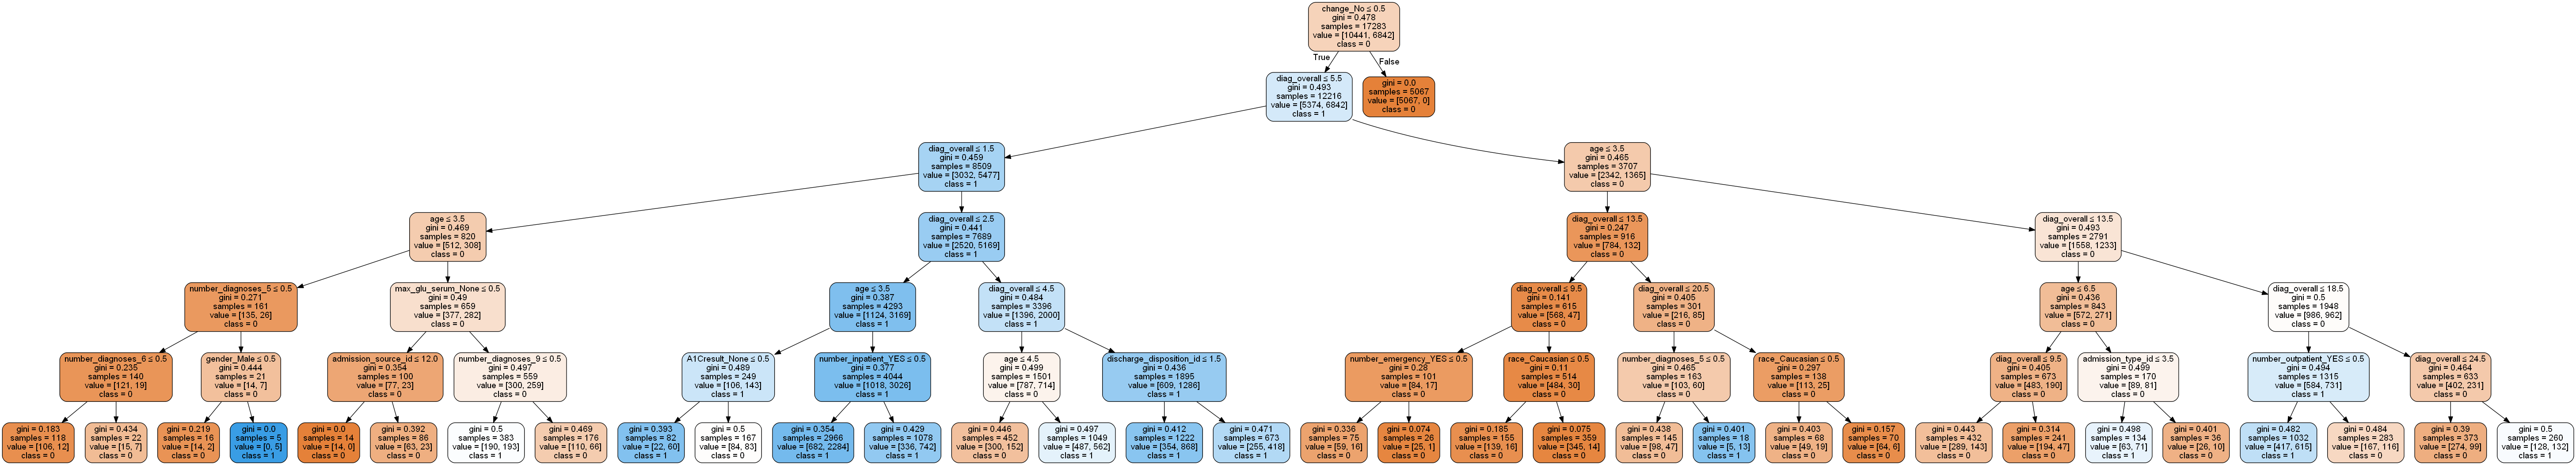

In [27]:
feature_cols = X.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [28]:
feature_cols = X.columns
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=True)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
change_No,0.680223
diag_overall,0.239139
age,0.057565
number_outpatient_YES,0.004654
number_inpatient_YES,0.003199
max_glu_serum_None,0.002796
discharge_disposition_id,0.002091
number_diagnoses_5,0.001968
A1Cresult_None,0.001834
gender_Male,0.001766


In [26]:
X =  df[['diag_overall','age','num_medications','number_inpatient','number_diagnoses']]
y =  df[["target"]]

In [27]:
# X=pd.get_dummies(X,drop_first=True)

In [28]:
X.head()

,diag_overall,age,num_medications,number_inpatient,number_diagnoses
0,0.0,1,18,0,9
1,1.0,3,16,0,7
2,2.0,4,8,0,5
3,2.0,5,16,0,9
4,3.0,4,17,0,9


# Test train split

In [29]:
X =  df.drop(['readmitted','target','change_No'], axis=1)
y =  df[["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123)

In [30]:
for i in range(2,18):
    clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=i, min_samples_leaf=5)
    clf_pruned.fit(X_train, y_train)
    preds_pruned = clf_pruned.predict(X_test)
    mat_pruned = confusion_matrix(y_test,preds_pruned)
    print("for depth=",i)
    print("confusion matrix = \n",mat_pruned)
    print('accuracy=',accuracy_score(y_test,preds_pruned))
    print('auc_score=',roc_auc_score(y_test,preds_pruned))
    print("*******************************************************************************")


for depth= 2
confusion matrix = 
 [[2558    0]
 [1763    0]]
accuracy= 0.5919925943068735
auc_score= 0.5
*******************************************************************************
for depth= 3
confusion matrix = 
 [[1360 1198]
 [ 515 1248]]
accuracy= 0.603563989817172
auc_score= 0.6197748258552461
*******************************************************************************
for depth= 4
confusion matrix = 
 [[1669  889]
 [ 688 1075]]
accuracy= 0.635038185605184
auc_score= 0.6311094795858045
*******************************************************************************
for depth= 5
confusion matrix = 
 [[2044  514]
 [1057  706]]
accuracy= 0.6364267530664198
auc_score= 0.5997577694925267
*******************************************************************************
for depth= 6
confusion matrix = 
 [[1804  754]
 [ 721 1042]]
accuracy= 0.658643832446193
auc_score= 0.6481382354780327
*******************************************************************************
for depth= 7
confu

In [31]:
clf_pruned=DecisionTreeClassifier(max_depth=6,min_samples_leaf=5,random_state=0)
clf_pruned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [32]:
feature_cols = X.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

4 [label=<A1Cresult_>8 &le; 0.5<br/>gini = 0.154<br/>samples = 310<br/>value = [284, 26]<br/>class = 0>, fillcolor="#e58139e8"] ;
  ^
Expected "}" (at char 727), (line:11, col:3)


AttributeError: 'NoneType' object has no attribute 'create_png'

In [33]:
feature_cols = X.columns
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=True)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(15)

,0
diag_overall,0.533890
age,0.278213
num_medications_LOW,0.079189
number_inpatient_YES,0.024362
num_medications_MEDIUM,0.017980
A1Cresult_None,0.009131
admission_source_id,0.007813
A1Cresult_>8,0.005703
admission_type_id,0.005599
num_lab_procedures_MEDIUM,0.005162


In [35]:
X =  df[['diag_overall','age','num_medications_LOW','number_inpatient_YES','num_medications_MEDIUM','A1Cresult_None']]
y =  df[["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123)

In [36]:
for i in range(2,18):
    clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=i, min_samples_leaf=5)
    clf_pruned.fit(X_train, y_train)
    preds_pruned = clf_pruned.predict(X_test)
    mat_pruned = confusion_matrix(y_test,preds_pruned)
    print("for depth=",i)
    print("confusion matrix = \n",mat_pruned)
    print('accuracy=',accuracy_score(y_test,preds_pruned))
    print('auc_score=',roc_auc_score(y_test,preds_pruned))
    print("*******************************************************************************")


for depth= 2
confusion matrix = 
 [[2558    0]
 [1763    0]]
accuracy= 0.5919925943068735
auc_score= 0.5
*******************************************************************************
for depth= 3
confusion matrix = 
 [[1360 1198]
 [ 515 1248]]
accuracy= 0.603563989817172
auc_score= 0.6197748258552461
*******************************************************************************
for depth= 4
confusion matrix = 
 [[1669  889]
 [ 688 1075]]
accuracy= 0.635038185605184
auc_score= 0.6311094795858045
*******************************************************************************
for depth= 5
confusion matrix = 
 [[2049  509]
 [1057  706]]
accuracy= 0.6375838926174496
auc_score= 0.6007350955284924
*******************************************************************************
for depth= 6
confusion matrix = 
 [[1803  755]
 [ 712 1051]]
accuracy= 0.6604952557278407
auc_score= 0.6504952376559785
*******************************************************************************
for depth= 7
conf

In [37]:
clf_pruned=DecisionTreeClassifier(max_depth=6,min_samples_leaf=5,random_state=0)
clf_pruned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [41]:
y_pred_test=clf_pruned.predict(X_test)
y_pred_train=clf_pruned.predict(X_train)
mat_pruned = confusion_matrix(y_test,y_pred_test)
print("confusion matrix = \n",mat_pruned)
print('accuracy=',accuracy_score(y_test,y_pred_test))
print('auc_score=',roc_auc_score(y_test,y_pred_test))

confusion matrix = 
 [[1803  755]
 [ 712 1051]]
accuracy= 0.6604952557278407
auc_score= 0.6504952376559785


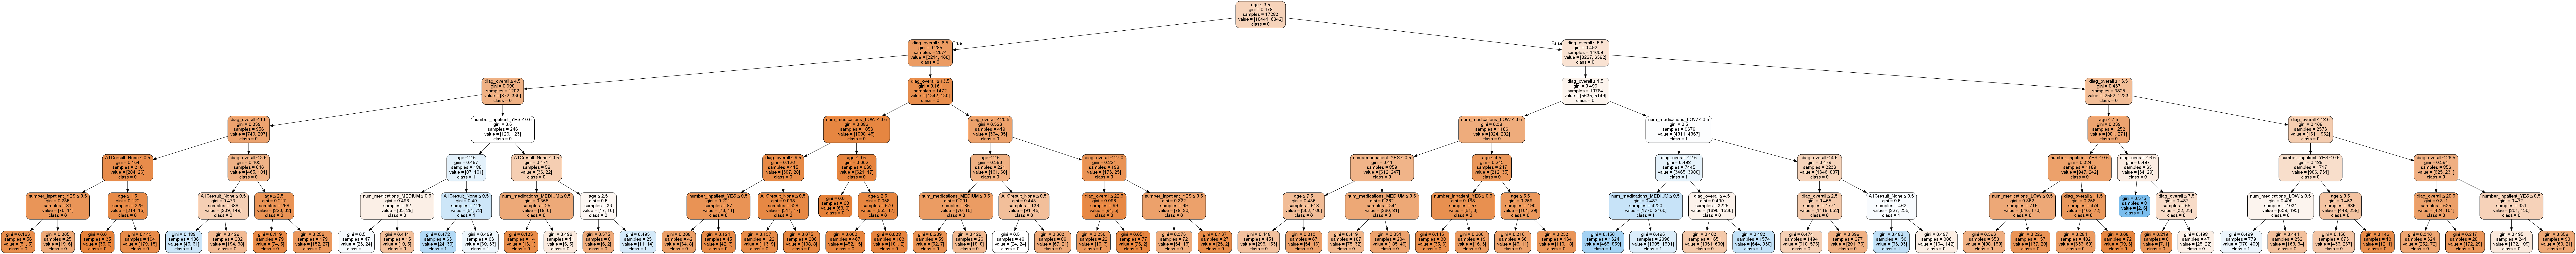

In [38]:
feature_cols = X.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
feature_cols = X.columns
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=True)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
diag_overall,0.555938
age,0.294897
num_medications_LOW,0.081448
number_inpatient_YES,0.028583
num_medications_MEDIUM,0.020163
A1Cresult_None,0.018971


## Logistic Regression

In [59]:
X =  df.drop(['target','readmitted'],axis=1)
y =  df[["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123)
m1=LogisticRegression()
m1.fit(X_train,y_train)
y_pred_lr=m1.predict(X_test)
Train_Score_lr = m1.score(X_train,y_train)
Test_Score_lr = accuracy_score(y_test,y_pred_lr)
print('Training Accuracy is:',Train_Score_lr)
print('Testing Accuracy is:',Test_Score_lr)
print('f1_score=',f1_score(y_test,y_pred_lr,average='weighted'))
print(classification_report(y_test,y_pred_lr))

Training Accuracy is: 0.7586067233697853
Testing Accuracy is: 0.7690349456144411
f1_score= 0.7709727132717954
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      2558
           1       0.68      0.81      0.74      1763

   micro avg       0.77      0.77      0.77      4321
   macro avg       0.77      0.78      0.77      4321
weighted avg       0.78      0.77      0.77      4321



In [61]:
df.columns

Index(['age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_overall',
       'number_diagnoses', 'readmitted', 'target', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Male',
       'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'change_No'],
      dtype='object')

In [64]:
abc=list(m1.coef_)
intercept=list(m1.intercept_)
coeff=pd.DataFrame(data=abc,columns=['age', 'admission_type_id', 'discharge_disposition_id','admission_source_id', 
                                     'time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications', 
                                     'number_outpatient','number_emergency', 'number_inpatient', 'diag_overall',
                                     'number_diagnoses', 'race_Asian','race_Caucasian', 
                                     'race_Hispanic', 'race_Other', 'gender_Male','max_glu_serum_>300', 'max_glu_serum_None',
                                     'max_glu_serum_Norm','A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'change_No'])
coeff['intercept']=intercept
coeff.T

,0
age,0.238735
admission_type_id,-0.027878
discharge_disposition_id,-0.015805
admission_source_id,0.000799
time_in_hospital,-0.006911
num_lab_procedures,-0.008787
num_procedures,-0.039325
num_medications,0.026036
number_outpatient,-0.048293
number_emergency,-0.012385


## KNN

In [43]:
X =  df[['diag_overall','age','num_medications','number_inpatient','number_diagnoses']]
y =  df[["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
neig = np.arange(2, 25)
train_accuracy = []
test_accuracy = []
train_auc_score = []
test_auc_score = []
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_knn =knn.predict(X_train)
    pred_knn_test= knn.predict(X_test)
    train_auc_score.append(roc_auc_score(pred_knn, y_train))
    test_auc_score.append(roc_auc_score(pred_knn_test, y_test))
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

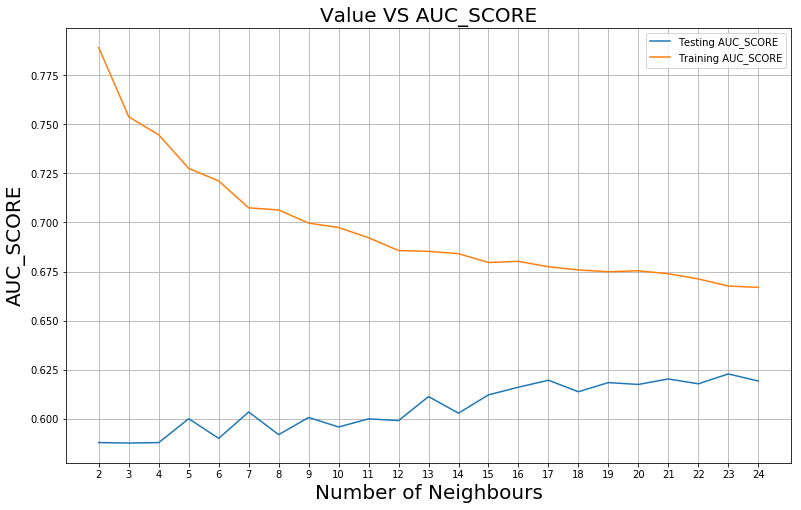

Best AUC_SCORE is 0.6227656831787354 with K = 22


In [45]:
plt.figure(figsize=[13,8])
plt.plot(neig, test_auc_score, label = 'Testing AUC_SCORE')
plt.plot(neig, train_auc_score, label = 'Training AUC_SCORE')
plt.legend()
plt.title('Value VS AUC_SCORE',fontsize=20)
plt.xlabel('Number of Neighbours',fontsize=20)
plt.ylabel('AUC_SCORE',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best AUC_SCORE is {} with K = {}".format(np.max(test_auc_score),1+test_auc_score.index(np.max(test_auc_score))))

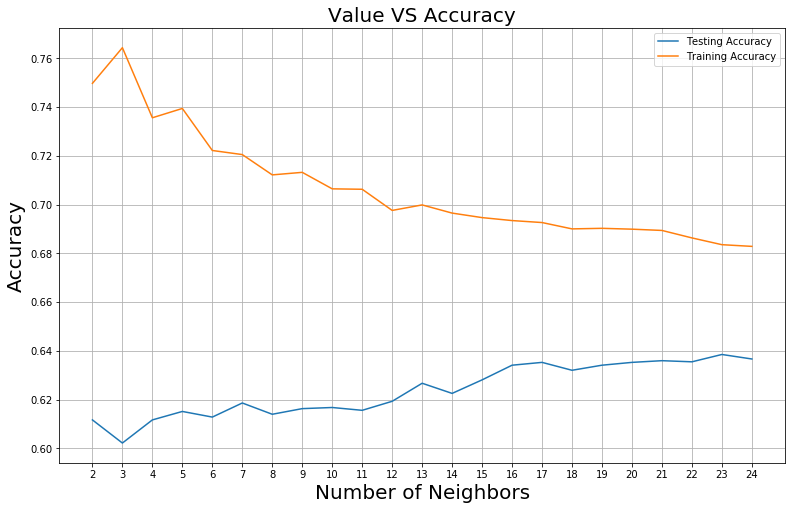

Best accuracy is 0.6385096042582735 with K = 22


In [46]:
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))# Plot


In [47]:
scor=pd.DataFrame(index=np.arange(2,25),columns=['train_auc_score','test_auc_score','train_accuracy','test_accuracy'])

In [48]:
scor['train_auc_score']=train_auc_score
scor['test_auc_score']=test_auc_score
scor['train_accuracy']=train_accuracy
scor['test_accuracy']=test_accuracy

In [49]:
scor

,train_auc_score,test_auc_score,train_accuracy,test_accuracy
2,0.789137,0.587767,0.749754,0.611664
3,0.753863,0.587533,0.764393,0.602175
4,0.744676,0.587754,0.735636,0.611664
5,0.727582,0.599931,0.739455,0.615135
6,0.721182,0.589905,0.722213,0.612821
7,0.707472,0.603367,0.720535,0.618607
8,0.706373,0.591809,0.712203,0.613978
9,0.699672,0.600570,0.713244,0.616293
10,0.697438,0.595704,0.706475,0.616755
11,0.692201,0.599860,0.706301,0.615598


In [50]:
xx=scor
xx.head()

,train_auc_score,test_auc_score,train_accuracy,test_accuracy
2,0.789137,0.587767,0.749754,0.611664
3,0.753863,0.587533,0.764393,0.602175
4,0.744676,0.587754,0.735636,0.611664
5,0.727582,0.599931,0.739455,0.615135
6,0.721182,0.589905,0.722213,0.612821


In [51]:
knn1 = KNeighborsClassifier(n_neighbors=22)
knn1.fit(X_train,y_train)
pred_knn =knn1.predict(X_train)
pred_knn_test= knn1.predict(X_test)
knn_mat= confusion_matrix(y_test,pred_knn_test)

In [52]:
print("confusion matrix = \n",knn_mat)
print('test accuracy =',accuracy_score(y_test,pred_knn_test))
print('train accuracy=',accuracy_score(y_train,pred_knn))
print('test auc_score =',roc_auc_score(y_test,pred_knn_test))
print('train auc_score=',roc_auc_score(y_train,pred_knn))

confusion matrix = 
 [[1949  609]
 [ 966  797]]
test accuracy = 0.6355010414255959
train accuracy= 0.686339177226176
test auc_score = 0.6069968561478075
train auc_score= 0.6547023417255199


In [53]:
bag_model=BaggingClassifier(base_estimator=knn1,random_state=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
param = {'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
gs=GridSearchCV(bag_model,param,cv=kf,scoring='roc_auc')
gs.fit(X,y)
print("Tuned hyperparameter k: {}".format(gs.best_params_)) 
print("Best score: {}".format(gs.best_score_))

Tuned hyperparameter k: {'n_estimators': 90}
Best score: 0.6884961092137453
